In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Import hilbert transform from mars

parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
    parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)

if p not in sys.path:
    sys.path.append(p)

import subprocess
hname = subprocess.check_output('hostname')

if 'ankitnse'.encode() in hname:

    if '%s/mars/mars/signal_processing' % p not in sys.path:
        sys.path.append('%s/mars/mars/signal_processing' % p)

else:
    # And standard list of subdirectories
    if '%s\\mars\\mars\\signal_processing' % p not in sys.path:
        sys.path.append('%s\\mars\\mars\\signal_processing' % p)

import hilbert_transform

In [2]:
f = h5py.File('RAMFG_n45_day1_trial_1_PAINT.mat')

In [3]:
X = f[f['cfg_PAINT_cond']['ChanTEP'][0][0]][:]

In [4]:
freqs = f['cfg_PAINT_cond']['ERSPfreq'][:].ravel()

In [12]:
# Assemble Gaussian filters
filters = []
for freq in freqs:
    filters.append(hilbert_transform.gaussian(X.T,1000, freq, freq/4))

In [13]:
# Hilbert transform
Xt = hilbert_transform.hilbert_transform(X[:, 0], 1000, filters)

In [29]:
Xt.shape

(51, 2500)

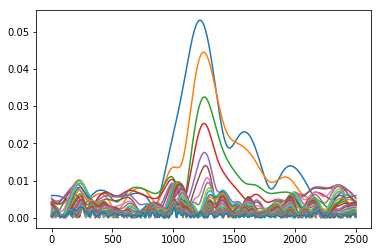

In [15]:
plt.plot(np.abs(Xt.T))

In [10]:
from cca import cannonical_corr_analysis

In [27]:
# Perform a cannonical correlation analysis, using our own Hilbert transform of the data

cannonical_corr_analysis('RAMFG_n45_day1_trial_1_PAINT.mat', use_hilbert = True)


[[array([[0.01198815]]), array([[-0.06119373]])],
 [array([[0.03886929]]), array([[-0.02772822]])],
 [array([[0.08147534]]), array([[0.02806135]])]]

In [19]:
isinstance([1, 2, 3], list)

True